In [54]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("white")

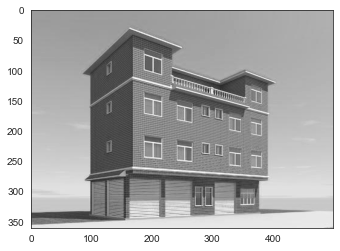

In [55]:
img = cv2.imread("../data/house1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
src_img = img.copy()
plt.imshow(img,cmap="gray")

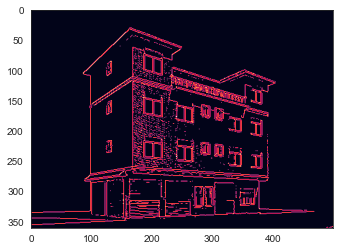

In [56]:
img = src_img.copy()
img = cv2.Canny(img,200,200)
plt.imshow(img)

In [57]:
"""极坐标初始化"""
n_angle = 180
w,h = img.shape
n_p = int(np.sqrt(w**2 + h**2))
polar_coordinates_matrix = np.zeros(shape = (n_p + 1,n_angle + 1))

for row,row_data in enumerate(img):
    for col,col_data in enumerate(row_data):
        if col_data == 0:
            continue
        else:
            for theta in range(0,n_angle + 1):
                p = int(row * np.cos(theta) + col * np.sin(theta))
                polar_coordinates_matrix[p][theta] += 1

In [63]:
polar_coordinates_matrix[polar_coordinates_matrix > 100]

array([149., 146., 105., 111., 108., 114., 106., 101., 103., 119., 161.,
       117., 110., 122., 126., 123., 109., 196., 102., 160., 133., 101.,
       121., 106., 107., 115., 114., 107., 113., 109., 187., 106., 132.,
       119., 111., 151., 196., 109., 102., 180., 106., 103., 122., 107.,
       161., 102., 101., 103.])

In [58]:
p = 267
theta = 110
new_img = np.zeros(img.shape)
polar_coordinates_matrix[p][theta]

196.0

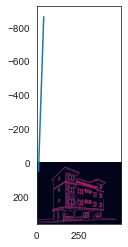

In [71]:
row1 = 10
col1 = int(p - (row1 * np.cos(theta)) / np.sin(theta))

row2 = 50
col2 = int(p - (row2 * np.cos(theta)) / np.sin(theta))
# col2 = 30


# plt.imshow(new_img,(row1,col1),(row2,col2),orgin="lower")
# new_img = cv2.line(new_img,(row1,col1),(row2,col2),(125, 255, 255))
plt.imshow(img,origin="upper")
plt.plot((row1,col1),(row2,col2))